In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [1]:
bs = 32

In [4]:
path = 'C:/Users/LALITH/Downloads/jaffedbase'
print(path)
path_img = path+'/jaffe'
print(path_img)

C:/Users/LALITH/Downloads/jaffedbase
C:/Users/LALITH/Downloads/jaffedbase/jaffe


In [5]:
fnames = get_image_files(path_img)
fnames[:5]

[WindowsPath('C:/Users/LALITH/Downloads/jaffedbase/jaffe/KA.AN1.39.tiff'),
 WindowsPath('C:/Users/LALITH/Downloads/jaffedbase/jaffe/KA.AN2.40.tiff'),
 WindowsPath('C:/Users/LALITH/Downloads/jaffedbase/jaffe/KA.AN3.41.tiff'),
 WindowsPath('C:/Users/LALITH/Downloads/jaffedbase/jaffe/KA.DI1.42.tiff'),
 WindowsPath('C:/Users/LALITH/Downloads/jaffedbase/jaffe/KA.DI2.43.tiff')]

In [6]:
np.random.seed(2)
pat = r'([A-Z]+)[0-9]\.[0-9]+\.tiff$'

In [7]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs)

In [8]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (171 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AN,AN,DI,FE,FE
Path: C:\Users\LALITH\Downloads\jaffedbase\jaffe;

Valid: LabelList (42 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AN,SA,HA,SU,NE
Path: C:\Users\LALITH\Downloads\jaffedbase\jaffe;

Test: None

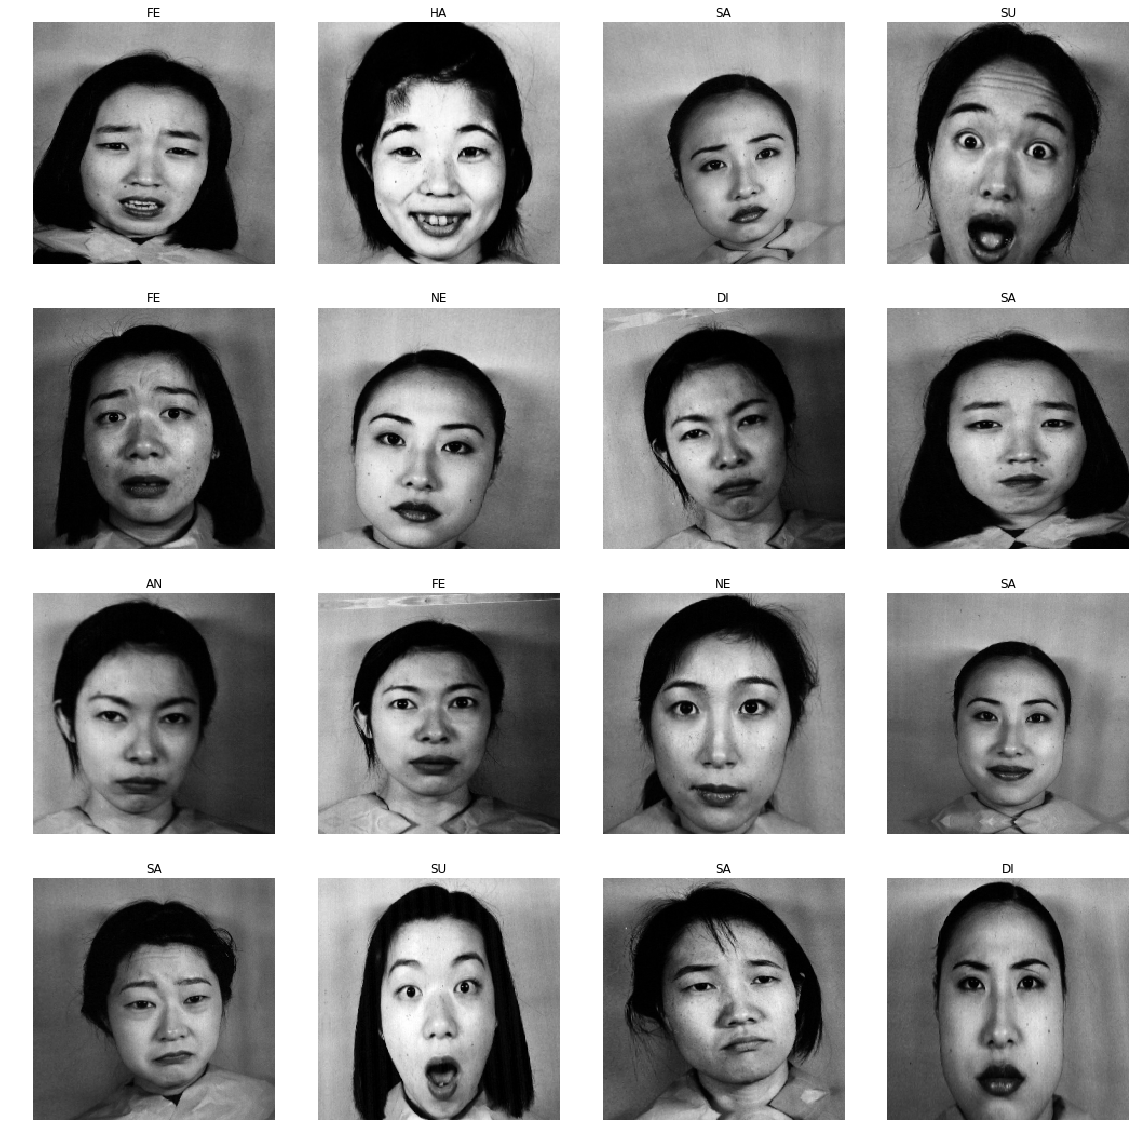

In [32]:
data.show_batch(rows=4, fig_size=(7, 6))

In [9]:
print(data.classes)

['AN', 'DI', 'FE', 'HA', 'NE', 'SA', 'SU']


In [10]:
len(data.classes)

7

In [11]:
data.c

7

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)